# Assignment 1: Basic Hebbian Learning
The assignment consists of the following points:
1) Load the data for this assignment from the file “lab2_1_data.csv” (rows are input dimensions, columns are different input patterns)
2) Implement a linear firing rate model (v = w * u)
3) Implement the basic Hebbian rule
    * start with a randomly initialized weight vector (e.g. from a uniform distribution over [-1,1]);
    * at each epoch:
        *  shuffle the input data sets (e.g., in MATLAB using the command randperm)
        *  for each pattern in the dataset
            * present the pattern and compute the output
            * apply the Hebbian learning rule (in the iterated, discrete map version, with learning rate; e.g., in the online version) stop learning if the weight vector stabilizes with respect to the values in the previous epoch (e.g. use a threshold value on the norm of w ) or if a maximum number of epochs have been performed;
4) Adapt the weights in w using the learning rule (implemented in the previous point)

5) After training is completed, plot a figure displaying (on the same graph) the training data points (points in the bidimensional space), the final weight vector w resulting from the learning process (e.g., in MATLAB using plotv) and the principal eigenvector of input correlation matrix Q (e.g., compute the correlation matrix, apply the eig() function and find the eigenvector associated with the maximum-eigenvalue – note: by default in MATLAB eig() does not always return the eigenvalues and eigenvectors in sorted order). Use a bolder line for displaying the principal eigenvector.
6) Generate two figures plotting the evolution in time of the two components of the weight vector w. For this, you will need to keep track of w (t) evolution during training. The plot will have time on the x-axis, and the weight value on the y-axis (provide a separate plot foreach component of the weight vector). Finally, provide another plot of the evolution in time of the norm of the weight vector during training. Note: at this point, 3 plots are required

# Bonus Track Assignment 1 – BCM Rule
Solve the same assignment as “Assignment 1,” but using the BMC learning rule. The same output as in “Assignment 1” is due.

## Libraries

In [1]:
import pandas as pd
from copy import copy

# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB2_1/Assignments/plot_functions.py
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB2_1/Assignments/HebbianLearning.py

from LAB2_1.Assignments.plot_functions import principal_components, plot_results
from LAB2_1.Assignments.HebbianLearning import Hebbian_learning, BCM_Rule

## Retrieve the dateset

In [2]:
# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/Sources/lab2_1_data.csv
source1 = pd.read_csv("./../../Sources/lab2_1_data.csv", header=None).to_numpy()
first_pc, second_pc = principal_components(source1)

## Assignment 1: Basic Hebbian Learning

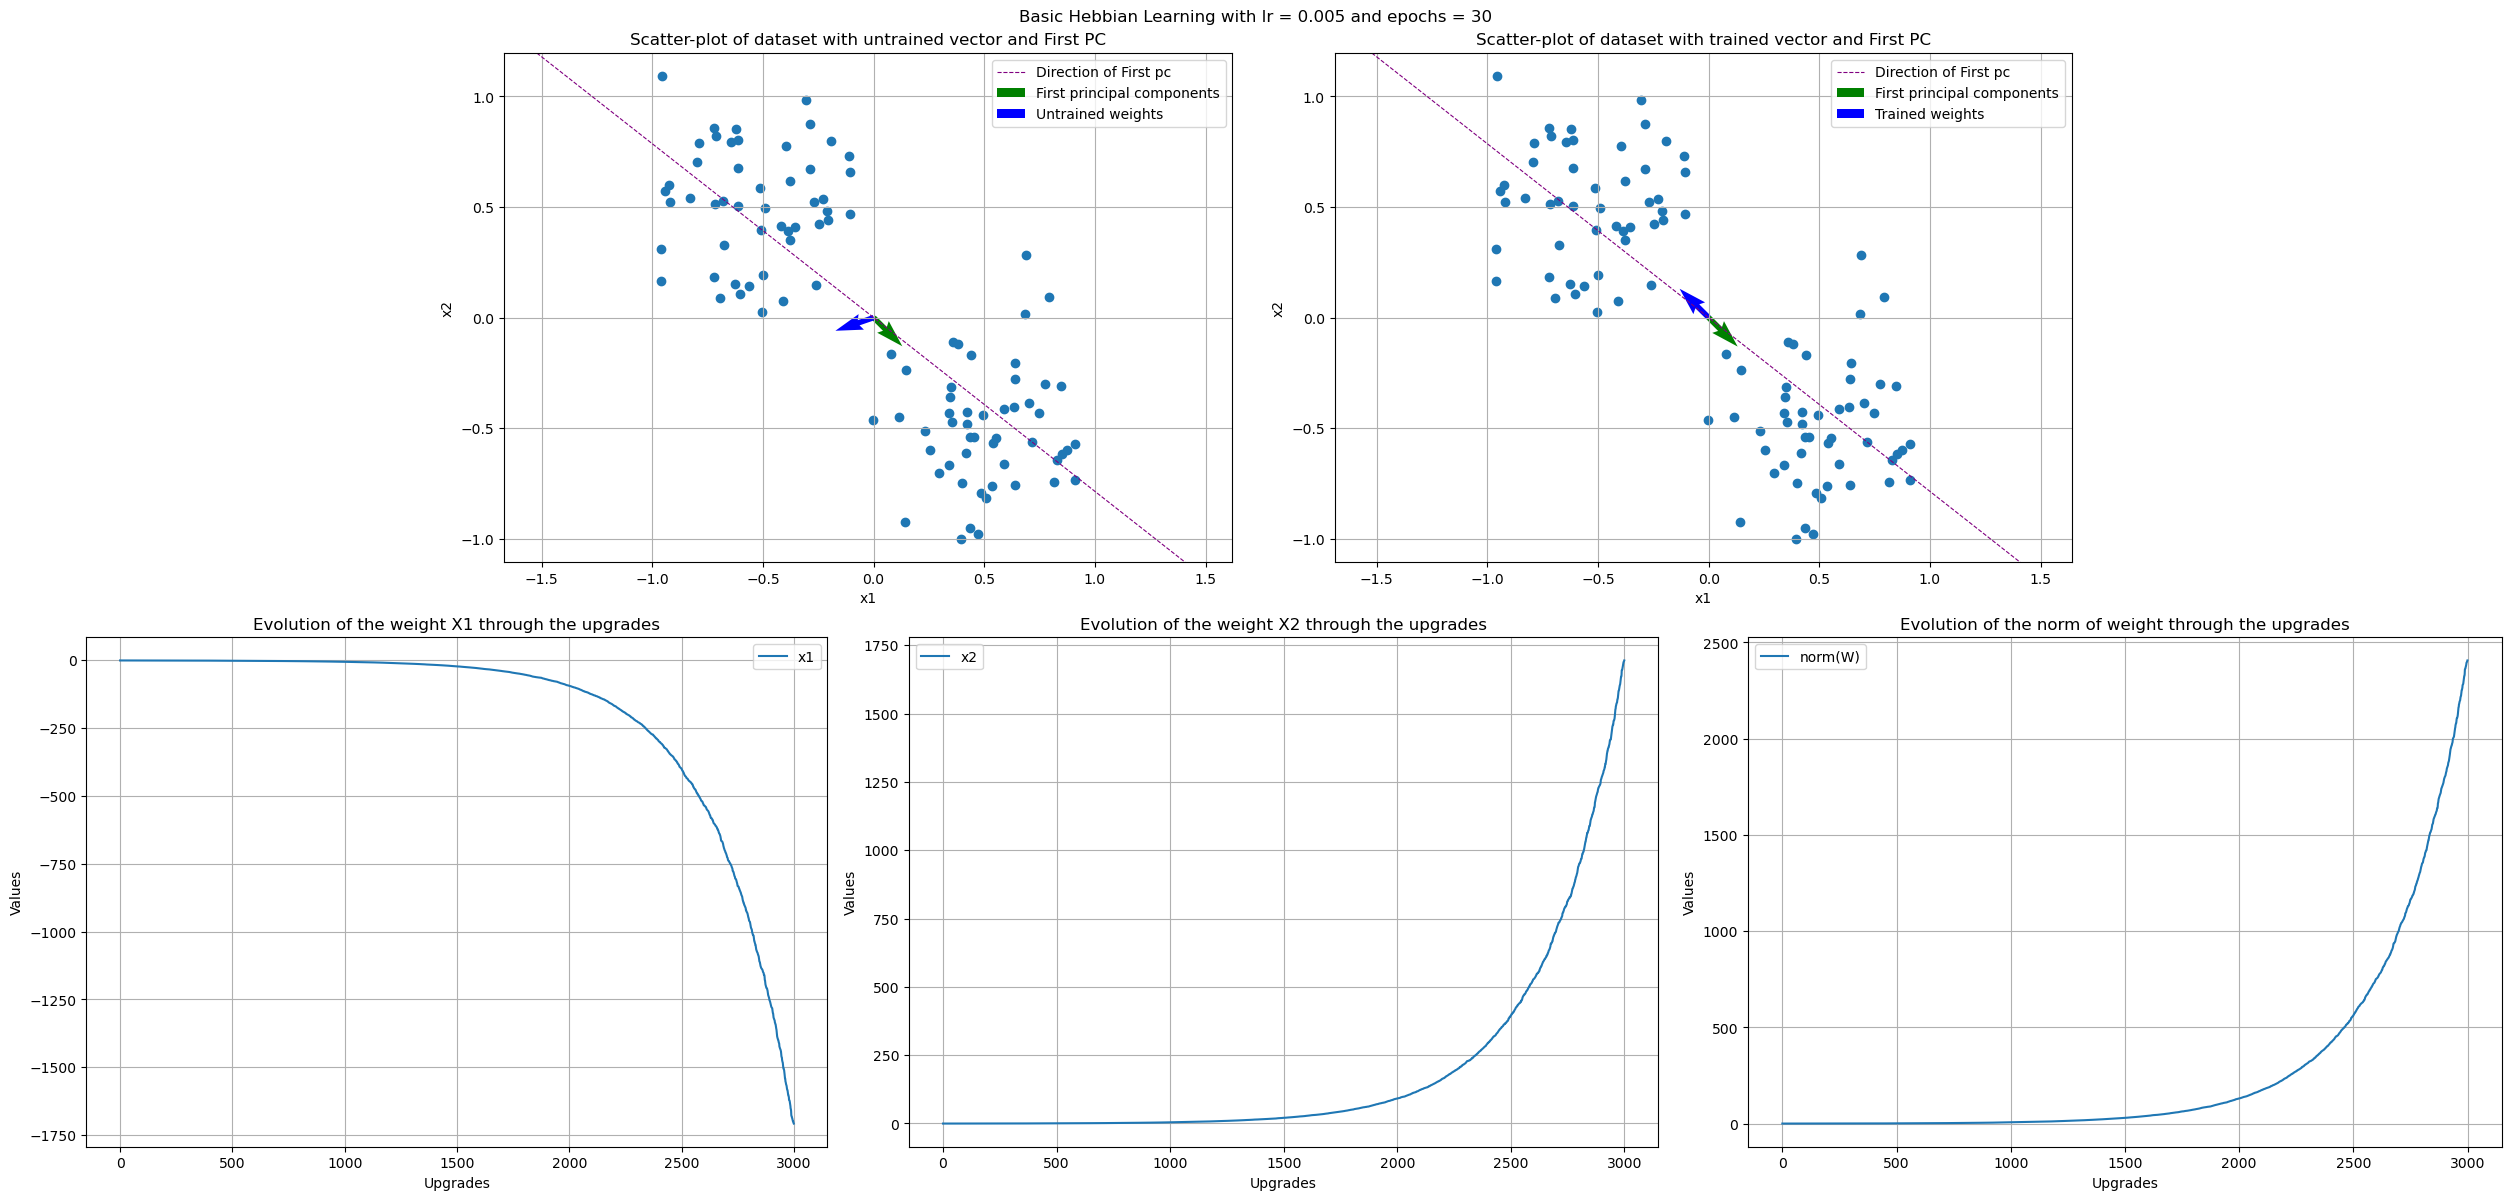

In [3]:
hebbianL = Hebbian_learning(source1.T, lr=0.005, epochs=30)
untrained_W = copy(hebbianL.W)
hebbianL()

plot_results(
    "Basic Hebbian Learning with lr = 0.005 and epochs = 30",
    source1,
    untrained_W,
    hebbianL.W,
    hebbianL.history_x1,
    hebbianL.history_x2,
    first_pc=first_pc,
    filename="01 - Hebbian lr 0_005 epochs 30")

## Bonus Track Assignment 1 – BCM Rule

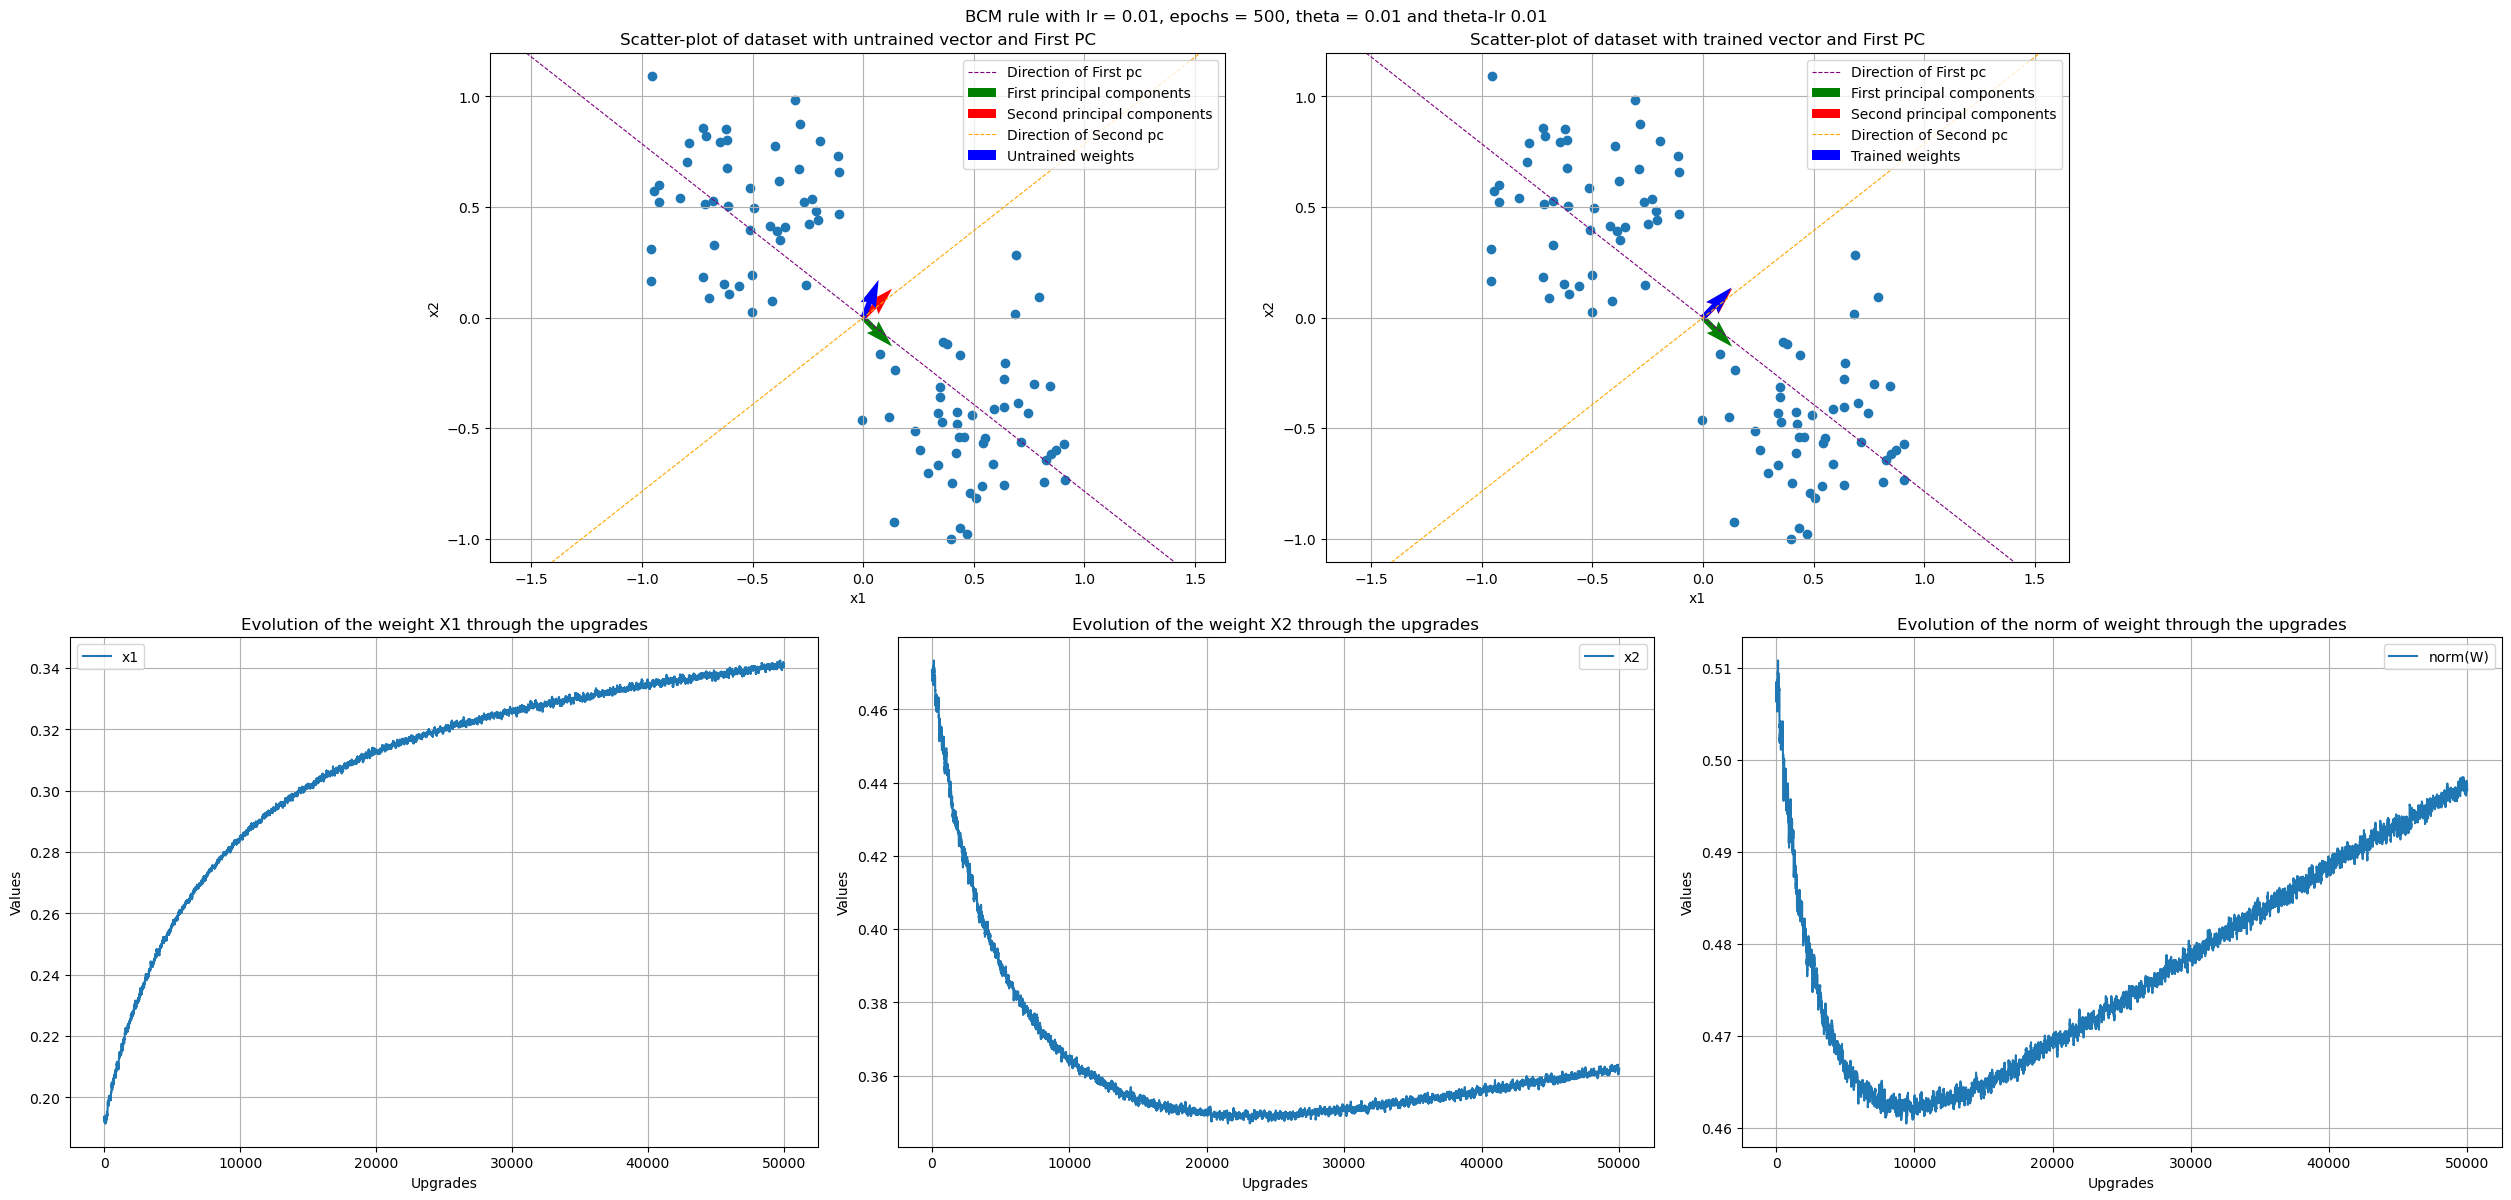

In [4]:
bcm_rule = BCM_Rule(theta = 0.01,
                    theta_lr = 0.01,
                    source = source1.T,
                    lr=0.01,
                    epochs=500,
                    threshold=1e-05)

untrained_W = copy(bcm_rule.W)
bcm_rule()

plot_results(
    "BCM rule with lr = 0.01, epochs = 500, theta = 0.01 and theta-lr 0.01",
    source1,
    untrained_W,
    bcm_rule.W,
    bcm_rule.history_x1,
    bcm_rule.history_x2,
    first_pc=first_pc,
    second_pc=second_pc,
    second_component=True,
    filename="06 - BCM lr 0_01 epochs 500 theta 0_01 theta_lr 0_01")